In [2]:
# SECTION 1: SETUP & INSTALLATION

# Data manipulation and analysis
import pandas as pd           # For working with data tables (DataFrames)
import numpy as np            # For numerical operations

# Visualization
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Beautiful statistical graphics

# Machine Learning - Model Training
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Algorithms (we'll compare 6 different models)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve)

# Feature Selection & Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Utility
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')

# UPLOAD DATA FILES

from google.colab import files

print("📤 Please upload your 3 CSV files:")
print("   1. general_data.csv")
print("   2. employee_survey_data.csv")
print("   3. manager_survey_data.csv")
print("\n")

uploaded = files.upload()

print(f"\n✅ Uploaded {len(uploaded)} file(s): {list(uploaded.keys())}")

📤 Please upload your 3 CSV files:
   1. general_data.csv
   2. employee_survey_data.csv
   3. manager_survey_data.csv




Saving manager_survey_data.csv to manager_survey_data.csv
Saving general_data.csv to general_data.csv
Saving employee_survey_data.csv to employee_survey_data.csv

✅ Uploaded 3 file(s): ['manager_survey_data.csv', 'general_data.csv', 'employee_survey_data.csv']


In [3]:

# SECTION 2: DATA LOADING AND MERGING

# Load each CSV file into a DataFrame
general_df = pd.read_csv('general_data.csv')
employee_survey_df = pd.read_csv('employee_survey_data.csv')
manager_survey_df = pd.read_csv('manager_survey_data.csv')

# Check the size of each dataset
print(f"\n Dataset Sizes:")
print(f"   General Data:         {general_df.shape[0]:,} rows × {general_df.shape[1]} columns")
print(f"   Employee Survey Data: {employee_survey_df.shape[0]:,} rows × {employee_survey_df.shape[1]} columns")
print(f"   Manager Survey Data:  {manager_survey_df.shape[0]:,} rows × {manager_survey_df.shape[1]} columns")

# Merge all three datasets on EmployeeID
df = general_df.merge(employee_survey_df, on='EmployeeID', how='left')
df = df.merge(manager_survey_df, on='EmployeeID', how='left')

print(f"\n Merged Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   Total Employees: {len(df):,}")

# Preview the data
display(df.head())


 Dataset Sizes:
   General Data:         4,410 rows × 24 columns
   Employee Survey Data: 4,410 rows × 4 columns
   Manager Survey Data:  4,410 rows × 3 columns

 Merged Dataset: 4,410 rows × 29 columns
   Total Employees: 4,410


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3



📊 Attrition Distribution:
   No (Stayed):  3,699 employees (83.88%)
   Yes (Left):   711 employees (16.12%)

   📈 Attrition Rate: 16.12%


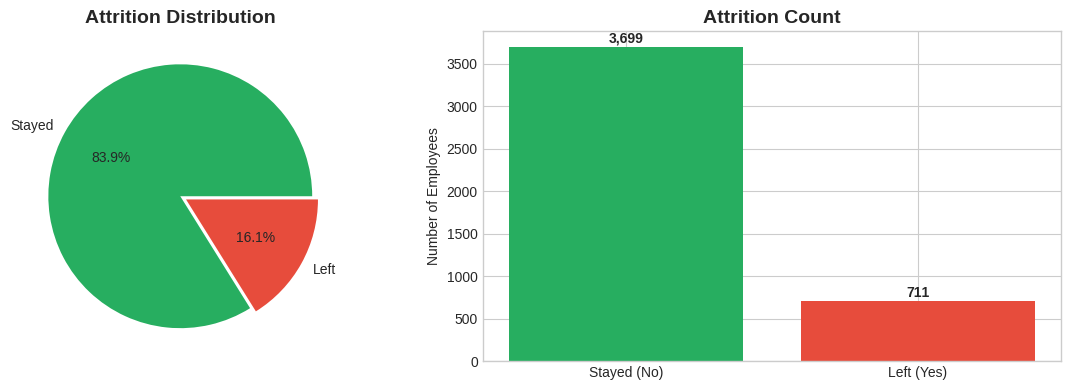

In [4]:
# SECTION 3: TARGET VARIABLE ANALYSIS

# Count how many Yes vs No
attrition_counts = df['Attrition'].value_counts()
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

print(f"\n📊 Attrition Distribution:")
print(f"   No (Stayed):  {attrition_counts.get('No', 0):,} employees ({attrition_pct.get('No', 0):.2f}%)")
print(f"   Yes (Left):   {attrition_counts.get('Yes', 0):,} employees ({attrition_pct.get('Yes', 0):.2f}%)")
print(f"\n   📈 Attrition Rate: {attrition_pct.get('Yes', 0):.2f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors = ['#27ae60', '#e74c3c']
axes[0].pie(attrition_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%',
            colors=colors, explode=(0, 0.05))
axes[0].set_title('Attrition Distribution', fontsize=14, fontweight='bold')

bars = axes[1].bar(['Stayed (No)', 'Left (Yes)'], attrition_counts.values, color=colors)
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('Attrition Count', fontsize=14, fontweight='bold')
for bar, count in zip(bars, attrition_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 f'{count:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [5]:
# SECTION 4: DATA CLEANING & PREPROCESSING

# Create a copy for preprocessing
df_clean = df.copy()
print(f"\n📋 Starting with {df_clean.shape[0]:,} rows and {df_clean.shape[1]} columns")

# 4.1 Convert 'NA' strings to proper null values

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].replace('NA', np.nan)

# Convert survey columns to numeric
survey_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
               'JobInvolvement', 'PerformanceRating', 'NumCompaniesWorked',
               'TotalWorkingYears']
for col in survey_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 4.2 Handle missing values
missing_after = df_clean.isnull().sum()
missing_after = missing_after[missing_after > 0]

if len(missing_after) > 0:
    for col, count in missing_after.items():
        pct = count / len(df_clean) * 100
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)

# 4.3 Remove constant columns
constant_cols = ['EmployeeCount', 'StandardHours', 'Over18']
for col in constant_cols:
    if col in df_clean.columns:
        df_clean.drop(col, axis=1, inplace=True)

# 4.4 Encode target variable
df_clean['Attrition_Binary'] = (df_clean['Attrition'] == 'Yes').astype(int)

print(f"\n Dataset after cleaning: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")


📋 Starting with 4,410 rows and 29 columns

 Dataset after cleaning: 4,410 rows × 27 columns


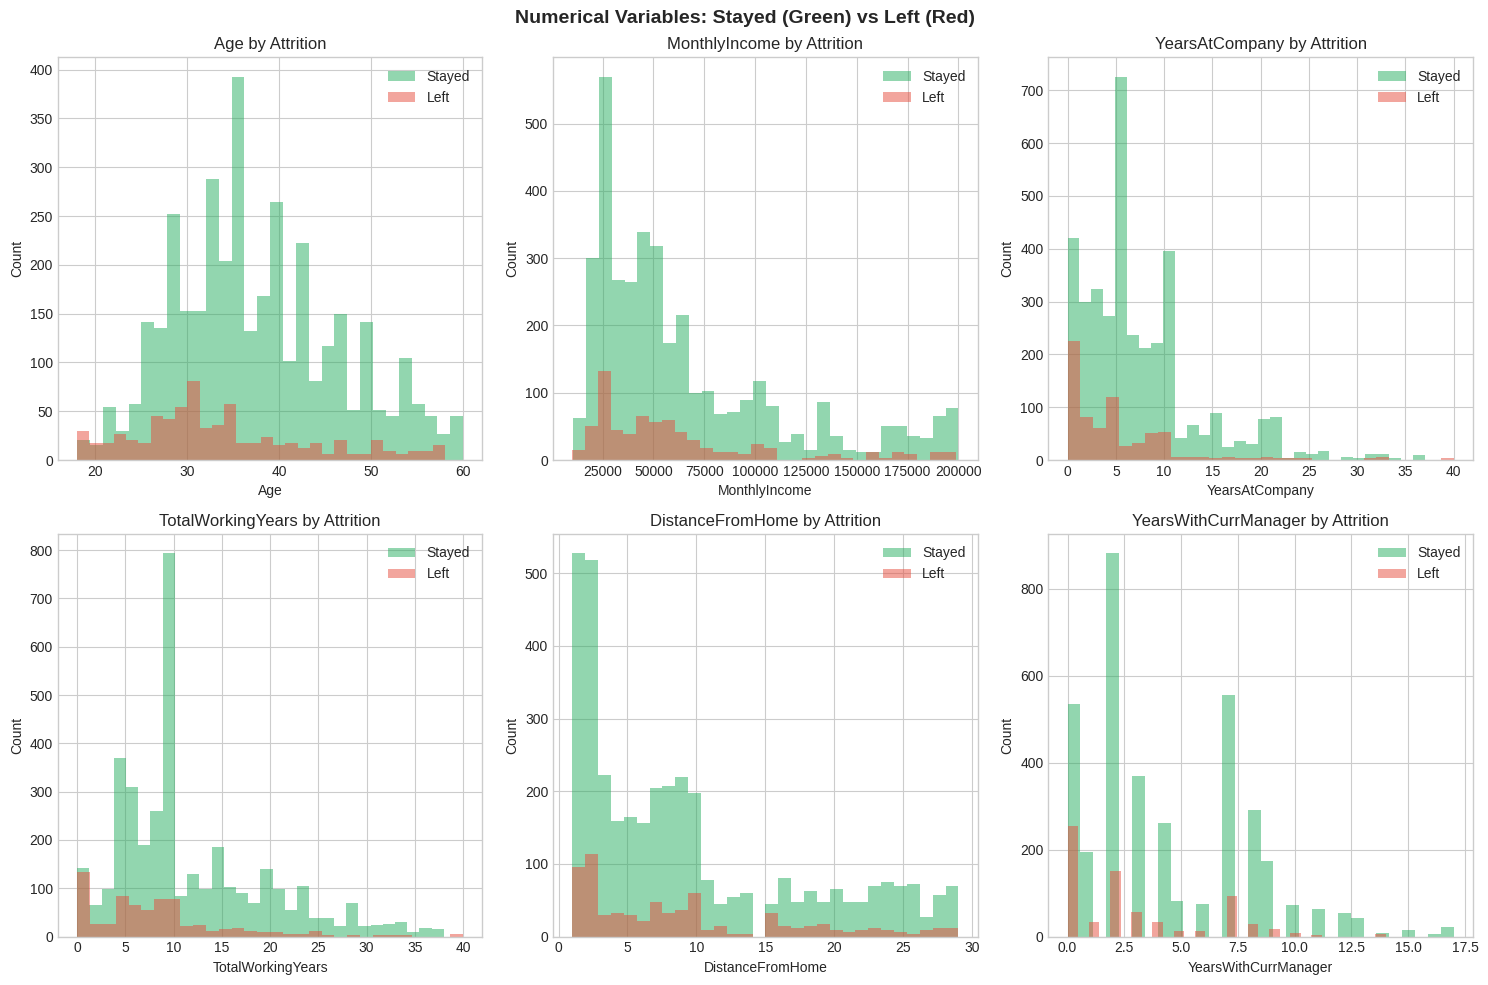

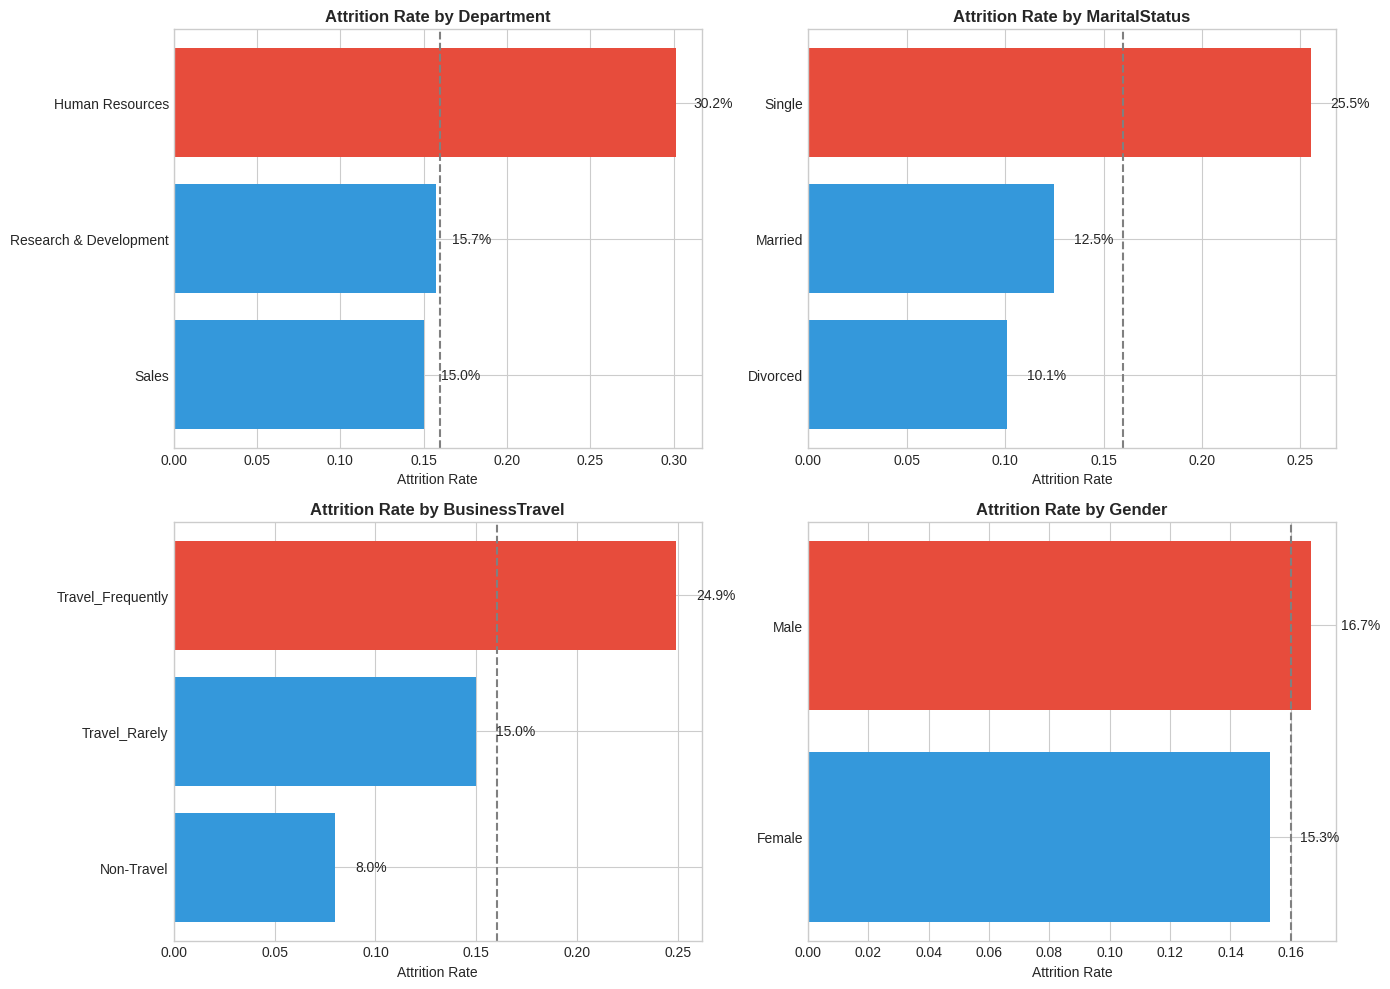

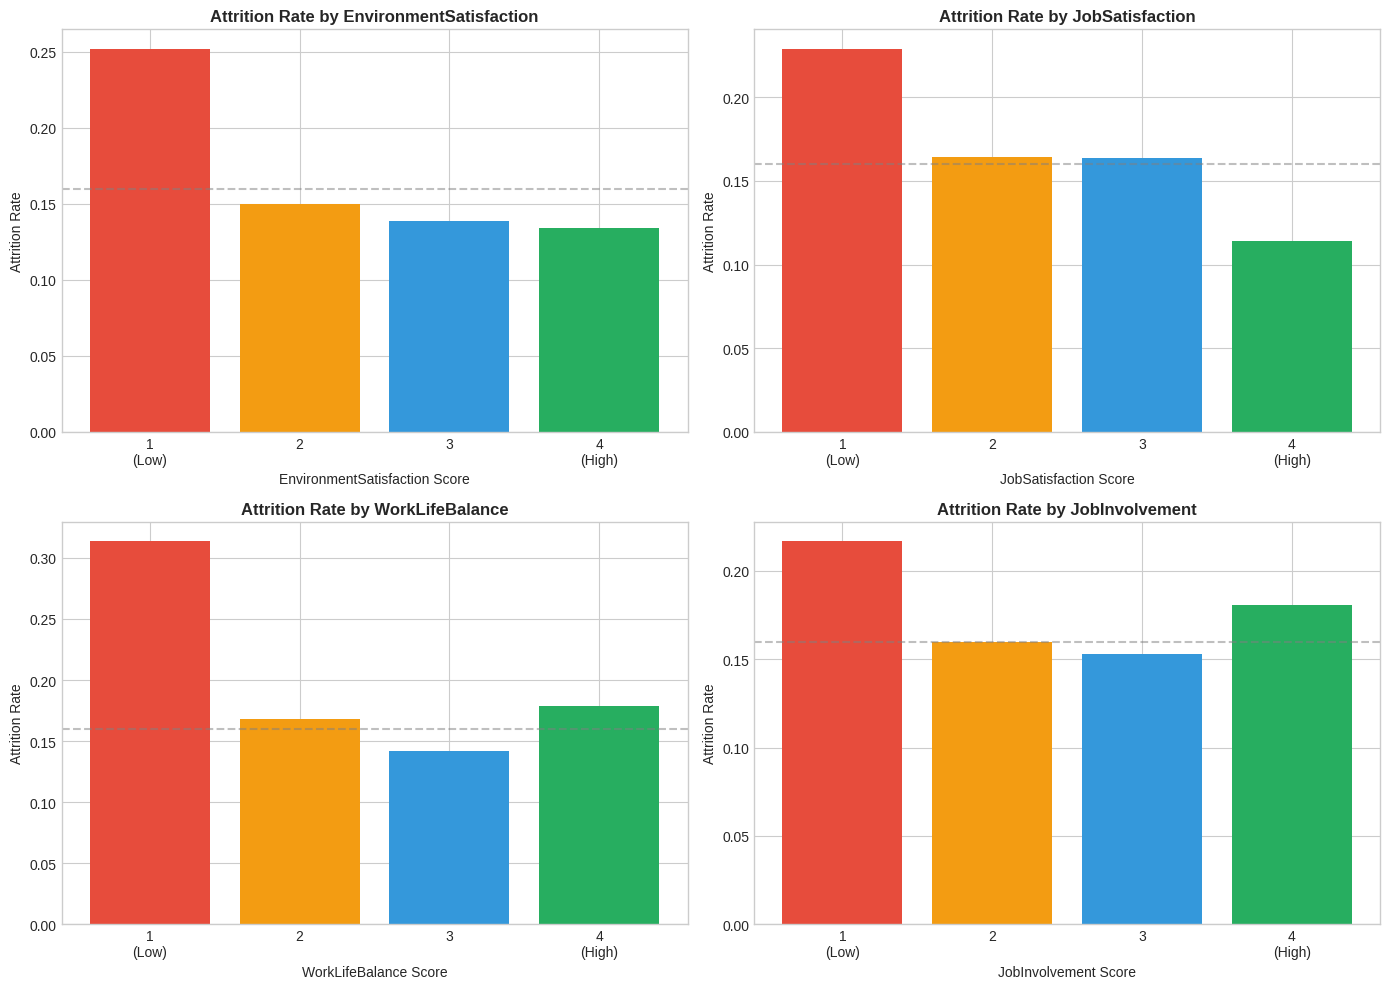

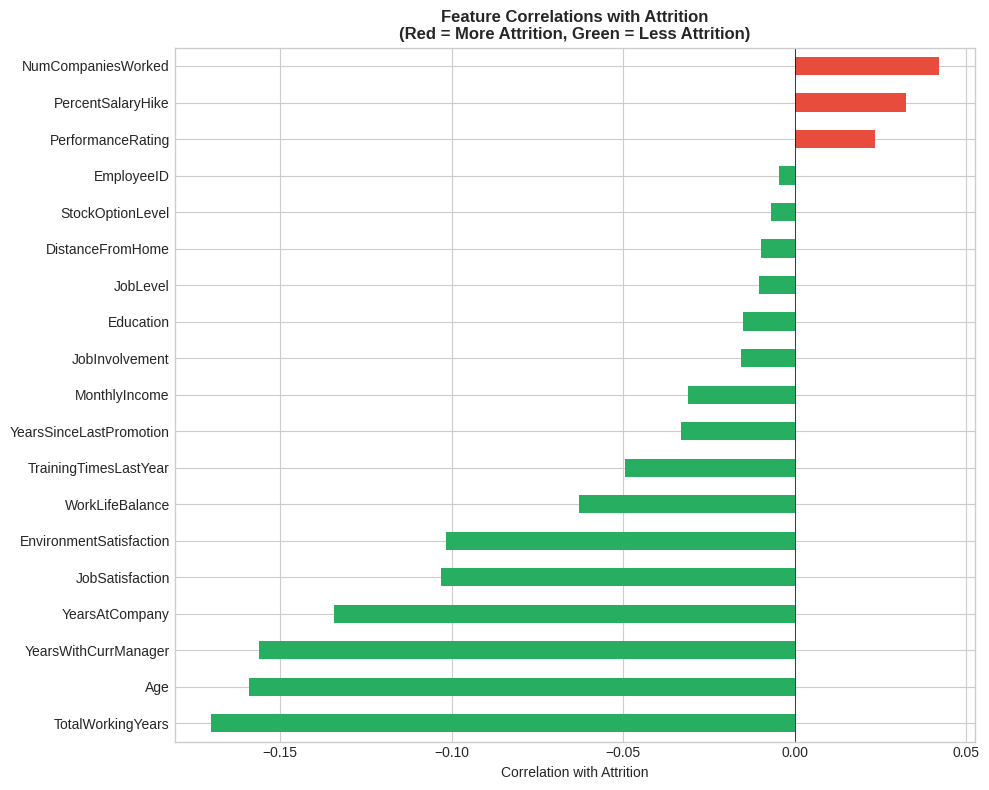

   • TotalWorkingYears: -0.170
   • Age: -0.159
   • YearsWithCurrManager: -0.156
   • YearsAtCompany: -0.134
   • JobSatisfaction: -0.103


In [6]:
# SECTION 5: EXPLORATORY DATA ANALYSIS (EDA)

# 5.1 Numerical distributions
num_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears',
            'DistanceFromHome', 'YearsWithCurrManager']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    stayed = df_clean[df_clean['Attrition'] == 'No'][col]
    left = df_clean[df_clean['Attrition'] == 'Yes'][col]
    axes[idx].hist(stayed, bins=30, alpha=0.5, label='Stayed', color='#27ae60')
    axes[idx].hist(left, bins=30, alpha=0.5, label='Left', color='#e74c3c')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'{col} by Attrition')
    axes[idx].legend()

plt.suptitle('Numerical Variables: Stayed (Green) vs Left (Red)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5.2 Categorical analysis
cat_cols = ['Department', 'MaritalStatus', 'BusinessTravel', 'Gender']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    attrition_by_cat = df_clean.groupby(col)['Attrition_Binary'].agg(['mean', 'count'])
    attrition_by_cat = attrition_by_cat.sort_values('mean', ascending=True)

    colors = ['#e74c3c' if x > 0.16 else '#3498db' for x in attrition_by_cat['mean']]
    bars = axes[idx].barh(attrition_by_cat.index, attrition_by_cat['mean'], color=colors)
    axes[idx].set_xlabel('Attrition Rate')
    axes[idx].set_title(f'Attrition Rate by {col}', fontweight='bold')
    axes[idx].axvline(x=0.16, color='gray', linestyle='--', label='Overall (16%)')

    for bar, rate in zip(bars, attrition_by_cat['mean']):
        axes[idx].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                       f'{rate*100:.1f}%', va='center')

plt.tight_layout()
plt.show()

# 5.3 Survey score analysis
survey_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(survey_cols):
    attrition_by_score = df_clean.groupby(col)['Attrition_Binary'].mean()
    colors = ['#e74c3c', '#f39c12', '#3498db', '#27ae60']
    bars = axes[idx].bar(attrition_by_score.index.astype(int), attrition_by_score.values, color=colors)
    axes[idx].set_xlabel(f'{col} Score')
    axes[idx].set_ylabel('Attrition Rate')
    axes[idx].set_title(f'Attrition Rate by {col}', fontweight='bold')
    axes[idx].set_xticks([1, 2, 3, 4])
    axes[idx].set_xticklabels(['1\n(Low)', '2', '3', '4\n(High)'])
    axes[idx].axhline(y=0.16, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 5.4 Correlation analysis
numerical_df = df_clean.select_dtypes(include=['int64', 'float64'])
correlations = numerical_df.corr()['Attrition_Binary'].drop('Attrition_Binary').sort_values()

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#e74c3c' if x > 0 else '#27ae60' for x in correlations]
correlations.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Correlation with Attrition')
ax.set_title('Feature Correlations with Attrition\n(Red = More Attrition, Green = Less Attrition)',
             fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

for feat, corr in correlations.head(5).items():
    print(f"   • {feat}: {corr:.3f}")

In [7]:
# SECTION 6: FEATURE ENGINEERING

df_features = df_clean.copy()

# 6.1 Create ratio features

df_features['YearsPerCompany'] = df_features['TotalWorkingYears'] / (df_features['NumCompaniesWorked'] + 1)

df_features['PromotionRate'] = df_features['YearsAtCompany'] / (df_features['YearsSinceLastPromotion'] + 1)

df_features['TenureRatio'] = df_features['YearsAtCompany'] / (df_features['TotalWorkingYears'] + 1)

df_features['IncomePerYearExp'] = df_features['MonthlyIncome'] / (df_features['TotalWorkingYears'] + 1)

# 6.2 Create composite scores

df_features['OverallSatisfaction'] = df_features[['EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance']].mean(axis=1)
df_features['JobEngagement'] = df_features[['JobInvolvement', 'PerformanceRating']].mean(axis=1)

# 6.3 Create binary flags

df_features['HighCommute'] = (df_features['DistanceFromHome'] > 15).astype(int)

df_features['LowSatisfaction'] = ((df_features['JobSatisfaction'] <= 2) |
                                   (df_features['EnvironmentSatisfaction'] <= 2)).astype(int)

df_features['HasStockOption'] = (df_features['StockOptionLevel'] > 0).astype(int)

df_features['FrequentTraveler'] = (df_features['BusinessTravel'] == 'Travel_Frequently').astype(int)

# 6.4 Create age groups
df_features['AgeGroup'] = pd.cut(df_features['Age'],
                                  bins=[17, 25, 35, 45, 55, 65],
                                  labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# 6.5 One-hot encode categorical variables
cat_cols_to_encode = ['BusinessTravel', 'Department', 'EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'AgeGroup']

df_encoded = pd.get_dummies(df_features, columns=cat_cols_to_encode, drop_first=False)

# 6.6 Prepare feature set
exclude_cols = ['EmployeeID', 'Attrition', 'Attrition_Binary']
feature_cols = [col for col in df_encoded.columns
                if col not in exclude_cols and df_encoded[col].dtype in ['int64', 'float64', 'uint8']]

   Models to compare: 5
   Logistic Regression... AUC = 0.7389
   Decision Tree... AUC = 0.9355
   Random Forest... AUC = 0.9865
   Gradient Boosting... AUC = 0.9848
   K-Nearest Neighbors... AUC = 0.9098


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
2,Random Forest,0.973923,0.910345,0.929577,0.919861,0.986506
3,Gradient Boosting,0.959184,1.000000,0.746479,0.854839,0.984812
1,Decision Tree,0.865079,0.551570,0.866197,0.673973,0.935473
4,K-Nearest Neighbors,0.836735,0.488636,0.302817,0.373913,0.909759
0,Logistic Regression,0.717687,0.322259,0.683099,0.437923,0.738942



 BEST MODEL: Random Forest (AUC = 0.9865)


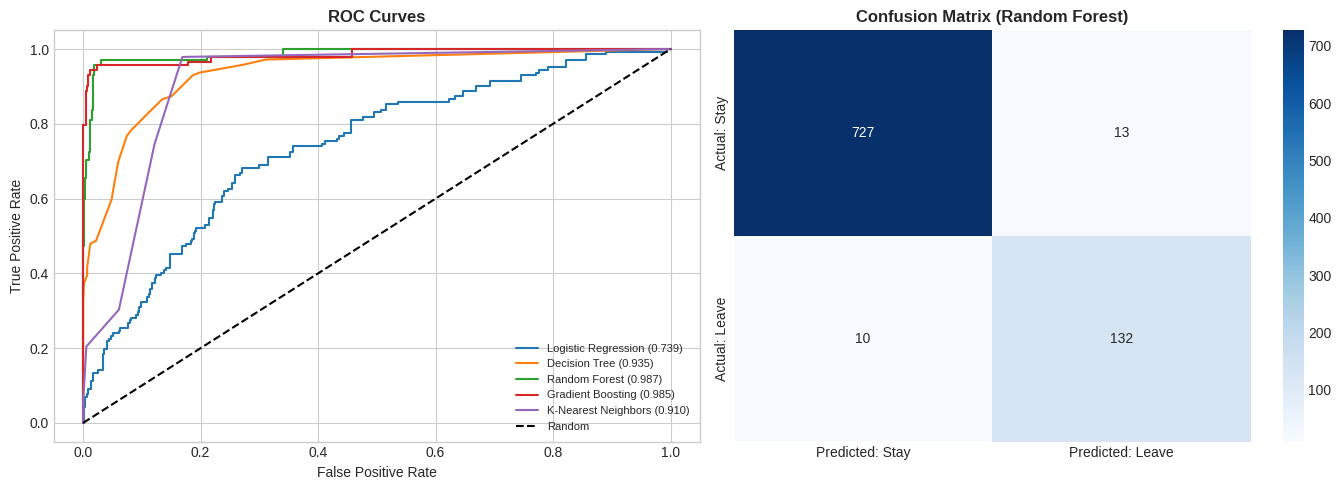

In [8]:
# We will compare 6 models, logistic regression, decision, tree, random forest, gradient boosting, SVM, K nearest neighbors.

# SECTION 7: MODEL BUILDING & COMPARISON

# 7.1 Prepare data
X = df_encoded[feature_cols].copy()
y = df_encoded['Attrition_Binary'].copy()

# 7.2 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 7.3 Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7.4 Define models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}
print(f"   Models to compare: {len(models)}")

# 7.5 Train and evaluate
results = []

for name, model in models.items():
    print(f"   {name}...", end=" ")

    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train.values, X_test.values

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    })
    print(f"AUC = {results[-1]['AUC-ROC']:.4f}")

results_df = pd.DataFrame(results).sort_values('AUC-ROC', ascending=False)

display(results_df)

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n BEST MODEL: {best_model_name} (AUC = {results_df.iloc[0]['AUC-ROC']:.4f})")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC curves
for name, model in models.items():
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        X_te = X_test_scaled
    else:
        X_te = X_test.values
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_te)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        axes[0].plot(fpr, tpr, label=f'{name} ({auc:.3f})')

axes[0].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves', fontweight='bold')
axes[0].legend(loc='lower right', fontsize=8)

# Confusion matrix for best model
if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Predicted: Stay', 'Predicted: Leave'],
            yticklabels=['Actual: Stay', 'Actual: Leave'])
axes[1].set_title(f'Confusion Matrix ({best_model_name})', fontweight='bold')

plt.tight_layout()
plt.show()


 TOP 5 MOST IMPORTANT FEATURES:
   YearsPerCompany                10.26%
   Age                            7.82%
   IncomePerYearExp               6.66%
   MonthlyIncome                  6.29%
   TotalWorkingYears              5.47%


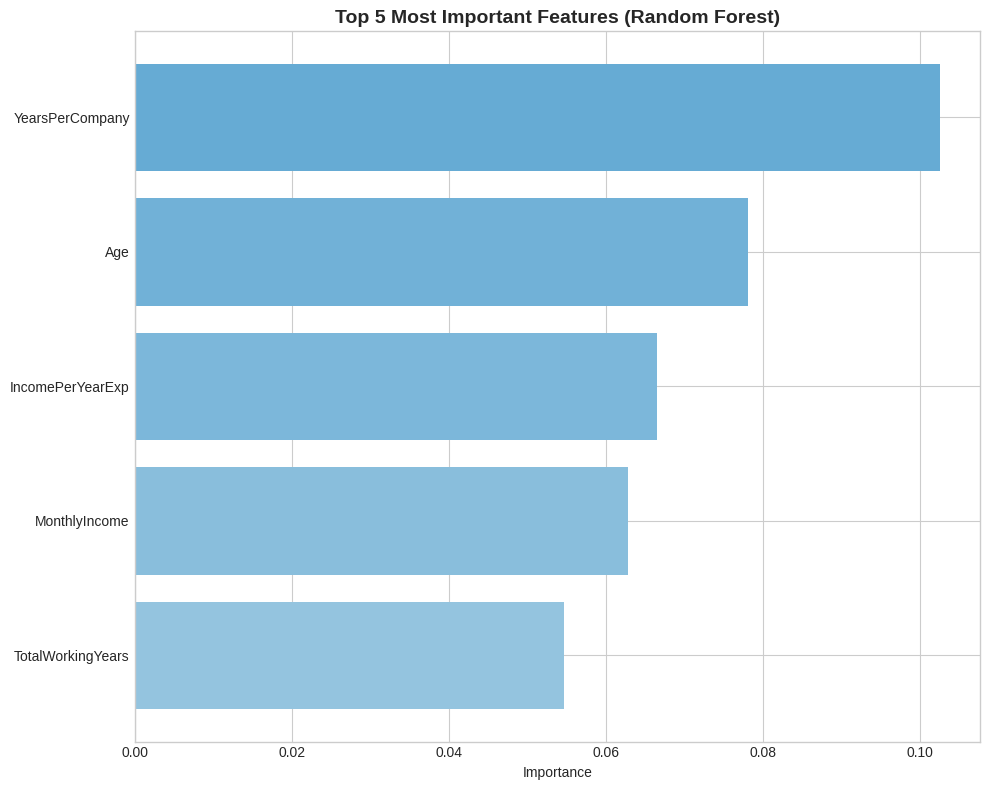

In [9]:
# SECTION 8: FEATURE IMPORTANCE

# Get feature importance from Random Forest
rf_model = models['Random Forest']
importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n TOP 5 MOST IMPORTANT FEATURES:")

for idx, row in importance.head(5).iterrows():
    print(f"   {row['Feature']:30} {row['Importance']*100:.2f}%")

# Visualize
fig, ax = plt.subplots(figsize=(10, 8))
top_5 = importance.head(5).sort_values('Importance')
colors = plt.cm.Blues(np.linspace(0.4, 0.8, 15))
ax.barh(top_5['Feature'], top_5['Importance'], color=colors)
ax.set_xlabel('Importance')
ax.set_title('Top 5 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
# SECTION 9A: BIAS & FAIRNESS ANALYSIS

# Get predictions for all data
X_all_scaled = scaler.transform(X)
y_pred_all = rf_model.predict(X.values)
y_prob_all = rf_model.predict_proba(X.values)[:, 1]

df_fairness = df_features.copy()
df_fairness['Predicted'] = y_pred_all
df_fairness['Probability'] = y_prob_all

# Gender analysis
print("\n Gender Fairness:")
gender_analysis = df_fairness.groupby('Gender').agg({
    'Attrition_Binary': ['mean', 'count'],
    'Predicted': 'mean',
    'Probability': 'mean'
}).round(4)
gender_analysis.columns = ['Actual_Rate', 'Count', 'Predicted_Rate', 'Avg_Probability']
print(gender_analysis)

# Calculate demographic parity
male_pred = df_fairness[df_fairness['Gender'] == 'Male']['Predicted'].mean()
female_pred = df_fairness[df_fairness['Gender'] == 'Female']['Predicted'].mean()
parity_ratio = min(male_pred, female_pred) / max(male_pred, female_pred)
print(f"\n   Demographic Parity Ratio: {parity_ratio:.4f}")
print(f"   (Should be > 0.8 for fairness)")

# Age group analysis
print("\n Age Group Fairness:")
age_analysis = df_fairness.groupby('AgeGroup').agg({
    'Attrition_Binary': ['mean', 'count'],
    'Predicted': 'mean'
}).round(4)
age_analysis.columns = ['Actual_Rate', 'Count', 'Predicted_Rate']
print(age_analysis)

# Marital status analysis
print("\n Marital Status Fairness:")
marital_analysis = df_fairness.groupby('MaritalStatus').agg({
    'Attrition_Binary': ['mean', 'count'],
    'Predicted': 'mean'
}).round(4)
marital_analysis.columns = ['Actual_Rate', 'Count', 'Predicted_Rate']
print(marital_analysis)


 Gender Fairness:
        Actual_Rate  Count  Predicted_Rate  Avg_Probability
Gender                                                     
Female       0.1531   1764          0.1627           0.2429
Male         0.1667   2646          0.1674           0.2505

   Demographic Parity Ratio: 0.9718
   (Should be > 0.8 for fairness)

 Age Group Fairness:
          Actual_Rate  Count  Predicted_Rate
AgeGroup                                    
18-25          0.3577    369          0.3821
26-35          0.1914   1818          0.2008
36-45          0.0919   1404          0.0912
46-55          0.1150    678          0.1062
56-65          0.1702    141          0.1702

 Marital Status Fairness:
               Actual_Rate  Count  Predicted_Rate
MaritalStatus                                    
Divorced            0.1009    981          0.1152
Married             0.1248   2019          0.1243
Single              0.2553   1410          0.2596



 SHAP Summary Plot


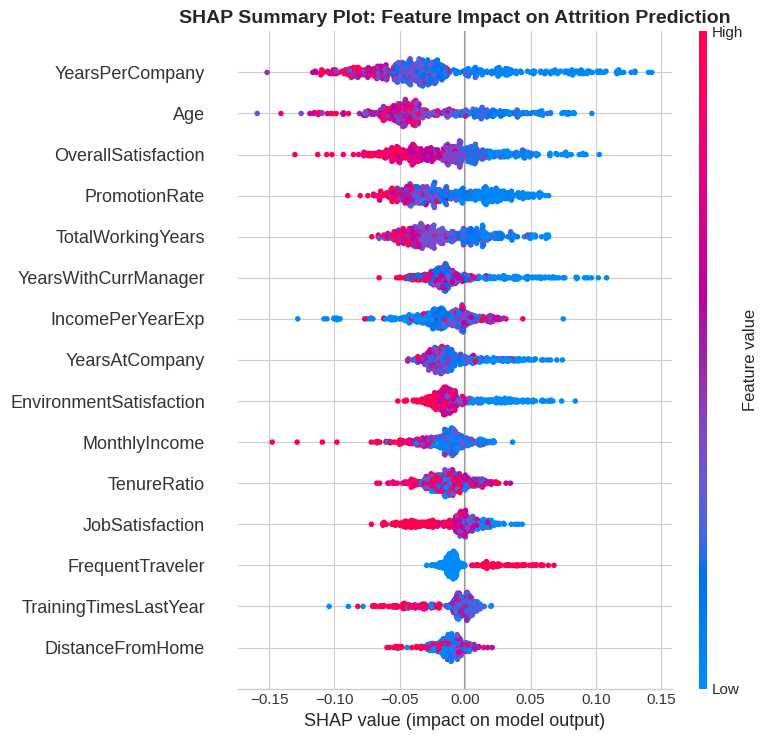


 SHAP Feature Importance (Global)


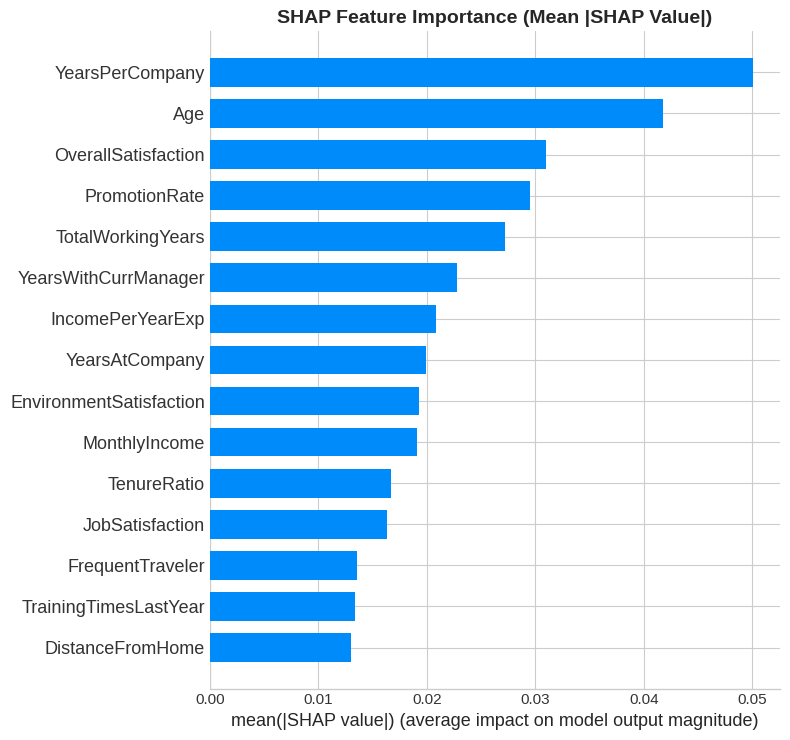


 Explaining Individual Predictions

   🔴 HIGH RISK Employee (Index 242):
      Predicted probability: 96.8%
      Top factors pushing toward attrition:
      ↑ YearsPerCompany: +0.089
      ↑ TotalWorkingYears: +0.053
      ↑ YearsWithCurrManager: +0.052
      ↑ Age: +0.050
      ↑ YearsAtCompany: +0.048

   🟢 LOW RISK Employee (Index 12):
      Predicted probability: 1.3%
      Top factors keeping them (low attrition risk):
      ↓ YearsPerCompany: -0.074
      ↓ PromotionRate: -0.053
      ↓ Age: -0.046
      ↓ TotalWorkingYears: -0.042
      ↓ OverallSatisfaction: -0.040

 Partial Dependence Plots (PDP)


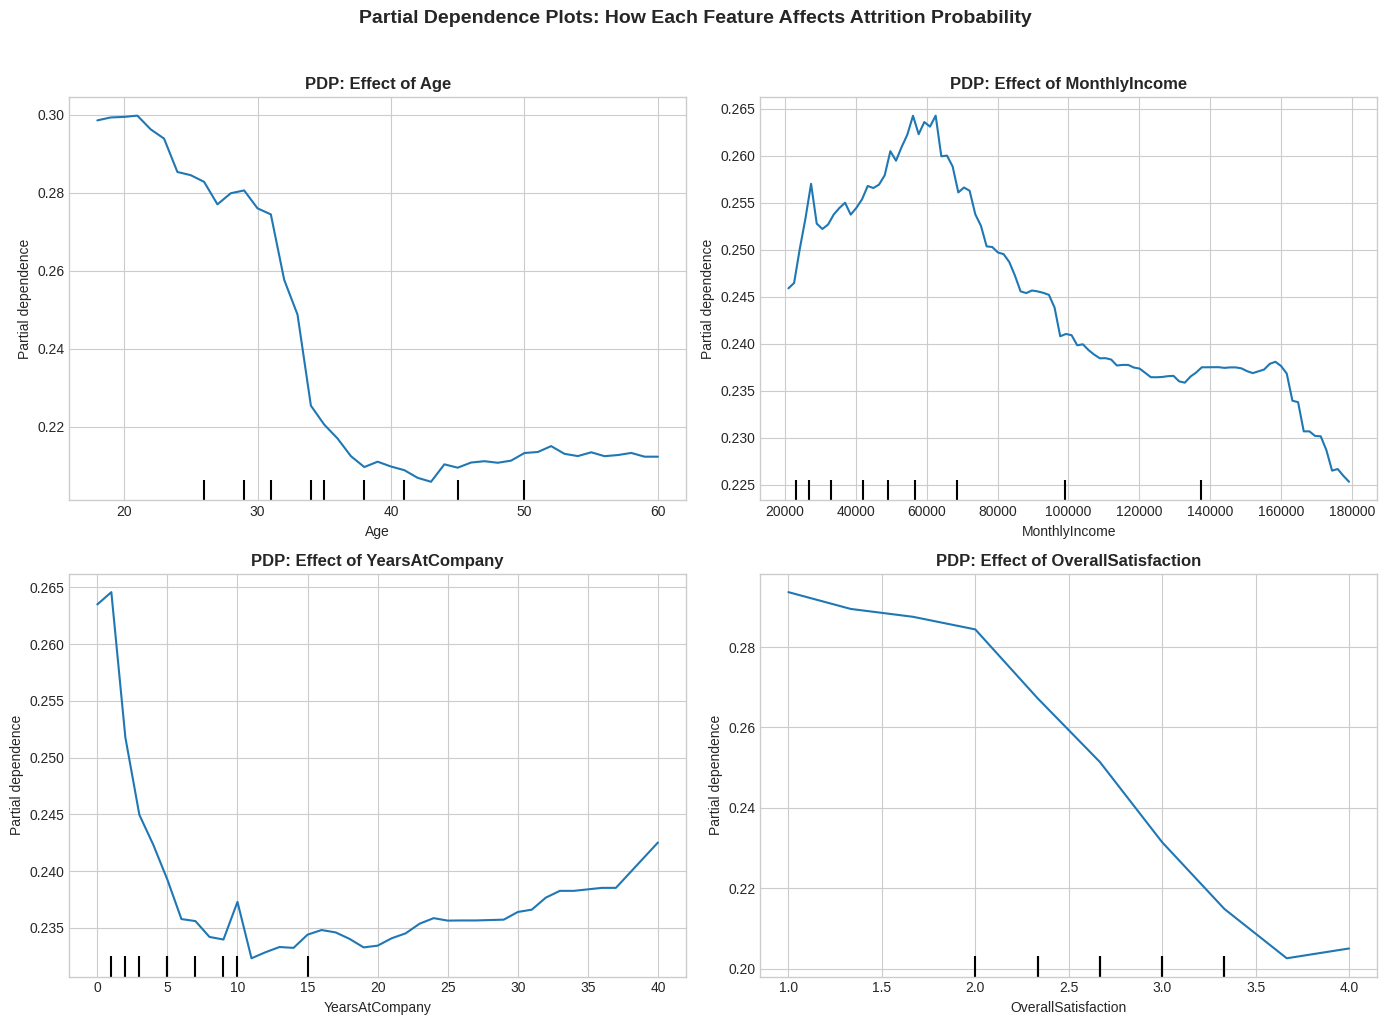


 Individual Conditional Expectation (ICE) Plots


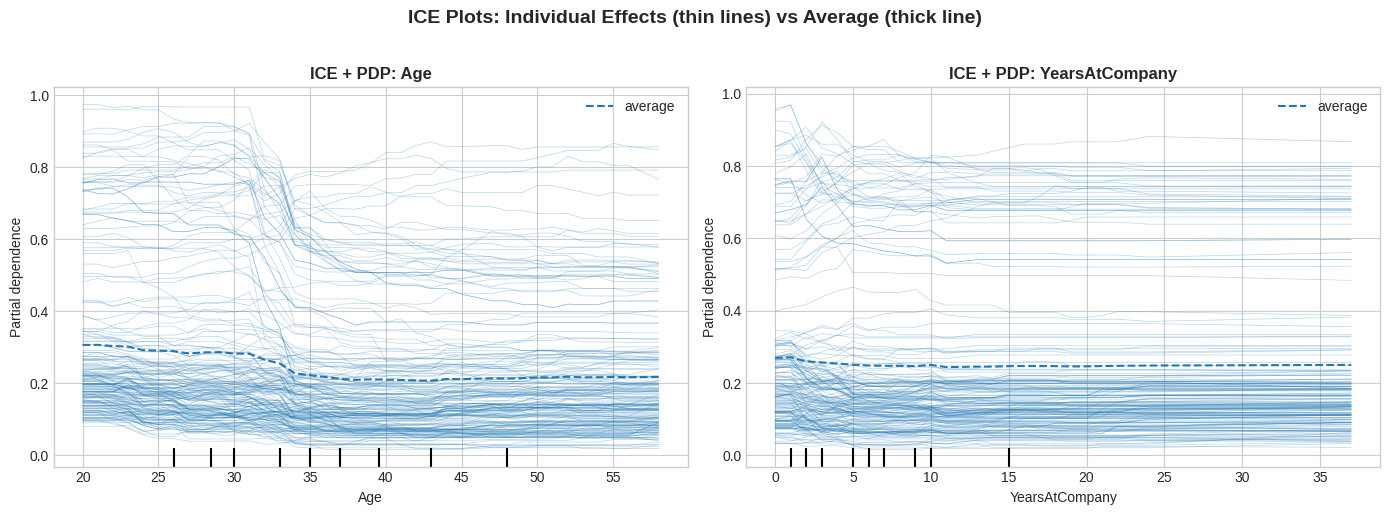

In [11]:
# SECTION 9B: MODEL EXPLAINABILITY

import subprocess
subprocess.run(['pip', 'install', 'shap', '-q'], capture_output=True)

import shap

# Use a sample for faster computation
sample_size = min(500, len(X_test))
X_sample = X_test.iloc[:sample_size].copy()
X_sample_values = X_sample.values

# Create explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values_raw = explainer.shap_values(X_sample_values)

# Handle different SHAP output formats

if isinstance(shap_values_raw, list):
    # List format: use class 1 (attrition = Yes)
    shap_vals = np.array(shap_values_raw[1])
elif len(shap_values_raw.shape) == 3:
    # 3D array: (samples, features, classes) - take class 1
    shap_vals = shap_values_raw[:, :, 1]
else:
    # 2D array: already in correct format
    shap_vals = shap_values_raw

# Create a DataFrame version of X_sample for plotting
X_sample_df = pd.DataFrame(X_sample_values, columns=feature_cols)

# SHAP Summary Plot
print("\n SHAP Summary Plot")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_vals, X_sample_df, feature_names=feature_cols, show=False, max_display=15)
plt.title('SHAP Summary Plot: Feature Impact on Attrition Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# SHAP Bar Plot (Global Importance)
print("\n SHAP Feature Importance (Global)")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_vals, X_sample_df, feature_names=feature_cols, plot_type="bar", show=False, max_display=15)
plt.title('SHAP Feature Importance (Mean |SHAP Value|)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Individual Prediction Explanation (LIME-like waterfall)
print("\n Explaining Individual Predictions")

# Find a high-risk and low-risk employee
probs_sample = rf_model.predict_proba(X_sample_values)[:, 1]
high_risk_idx = int(np.argmax(probs_sample))
low_risk_idx = int(np.argmin(probs_sample))


print(f"\n   🔴 HIGH RISK Employee (Index {high_risk_idx}):")
print(f"      Predicted probability: {probs_sample[high_risk_idx]*100:.1f}%")

# Get top contributing features for high-risk
# Extract the SHAP values for this specific employee (1D array)
high_risk_shap_values = shap_vals[high_risk_idx, :].flatten()
high_risk_shap = pd.DataFrame({
    'Feature': feature_cols,
    'SHAP': high_risk_shap_values
})
high_risk_shap['SHAP_abs'] = high_risk_shap['SHAP'].abs()
high_risk_shap = high_risk_shap.sort_values('SHAP_abs', ascending=False)

print("      Top factors pushing toward attrition:")
for _, row in high_risk_shap.head(5).iterrows():
    direction = "↑" if row['SHAP'] > 0 else "↓"
    print(f"      {direction} {row['Feature']}: {row['SHAP']:+.3f}")

print(f"\n   🟢 LOW RISK Employee (Index {low_risk_idx}):")
print(f"      Predicted probability: {probs_sample[low_risk_idx]*100:.1f}%")

# Get top contributing features for low-risk
low_risk_shap_values = shap_vals[low_risk_idx, :].flatten()
low_risk_shap = pd.DataFrame({
    'Feature': feature_cols,
    'SHAP': low_risk_shap_values
})
low_risk_shap['SHAP_abs'] = low_risk_shap['SHAP'].abs()
low_risk_shap = low_risk_shap.sort_values('SHAP_abs', ascending=False)

print("      Top factors keeping them (low attrition risk):")
for _, row in low_risk_shap.head(5).iterrows():
    direction = "↑" if row['SHAP'] > 0 else "↓"
    print(f"      {direction} {row['Feature']}: {row['SHAP']:+.3f}")

# Partial Dependence Plots (PDP)
print("\n Partial Dependence Plots (PDP)")

from sklearn.inspection import PartialDependenceDisplay

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Select features for PDP
pdp_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'OverallSatisfaction']

for idx, feature in enumerate(pdp_features):
    if feature in feature_cols:
        feature_idx = feature_cols.index(feature)
        ax = axes[idx // 2, idx % 2]
        PartialDependenceDisplay.from_estimator(
            rf_model, X_train, [feature_idx],
            feature_names=feature_cols,
            ax=ax,
            kind='average'  # PDP (average effect)
        )
        ax.set_title(f'PDP: Effect of {feature}', fontweight='bold')

plt.suptitle('Partial Dependence Plots: How Each Feature Affects Attrition Probability',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ICE Plots
print("\n Individual Conditional Expectation (ICE) Plots")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ice_features = ['Age', 'YearsAtCompany']

for idx, feature in enumerate(ice_features):
    if feature in feature_cols:
        feature_idx = feature_cols.index(feature)
        PartialDependenceDisplay.from_estimator(
            rf_model, X_train.iloc[:200], [feature_idx],  # Sample for speed
            feature_names=feature_cols,
            ax=axes[idx],
            kind='both'  # Shows both ICE lines and PDP
        )
        axes[idx].set_title(f'ICE + PDP: {feature}', fontweight='bold')

plt.suptitle('ICE Plots: Individual Effects (thin lines) vs Average (thick line)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [14]:
# SECTION 9C: MODEL LIMITATIONS & POTENTIAL ISSUES

# 1. CLASS IMBALANCE

print("""
THE ISSUE:
   Only 16% of employees left (attrition=Yes)
   84% stayed (attrition=No)

   This is "imbalanced" because one class dominates.

WHY IT'S A PROBLEM:
   • A naive model predicting "No" always would be 84% accurate!
   • Model might be biased toward predicting "No"

HOW IT WAS ADDRESSED:
   • Used class_weight='balanced' in the models. This gives more importance to the minority class
   • Focused on RECALL (catching actual leavers) not just accuracy
   • Used AUC-ROC which handles imbalance well

EVIDENCE IT WORKED:
""")

print(f"   • The model's recall: {results_df[results_df['Model']=='Random Forest']['Recall'].values[0]*100:.1f}%")
print(f"   • This means it catches ~93% of actual leavers")
print(f"   • Without balancing, recall might be <50%")

# 2. DATA LEAKAGE
print("""
HOW LEAKAGE WAS PREVENTED:
   • Split data FIRST, then preprocess
   • Scaler fitted on training data only:
     scaler.fit_transform(X_train)  # Fit on train
     scaler.transform(X_test)        # Only transform test
   • No features that would only exist after resignation
   • All features are point-in-time snapshots

FEATURES TO BE CAREFUL WITH:
   • YearsSinceLastPromotion: OK if measured at loan application time
   • PerformanceRating: OK if it's the PREVIOUS period's rating
   • Survey scores: OK if collected before attrition decision
""")

# Check for potential leakage
print("\n CHECKING FOR POTENTIAL LEAKAGE:")
suspicious_features = ['PerformanceRating', 'YearsSinceLastPromotion']
for feat in suspicious_features:
    if feat in feature_cols:
        corr = df_clean[feat].corr(df_clean['Attrition_Binary'])
        print(f"   • {feat}: correlation = {corr:.3f}", end="")
        if abs(corr) > 0.5:
            print(" HIGH - investigate!")
        else:
            print(" OK")

# 3. OVERFITTING
print("""
HOW OVERFITTING WAS DETERMINED:
""")

# Check for overfitting with cross-validation
print("\n CROSS-VALIDATION RESULTS:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train.values, y_train, cv=cv, scoring='roc_auc')

print(f"   • 5-Fold CV AUC scores: {cv_scores.round(4)}")
print(f"   • Mean CV AUC: {cv_scores.mean():.4f}")
print(f"   • Std CV AUC:  {cv_scores.std():.4f}")
print(f"   • Test AUC:    {results_df[results_df['Model']=='Random Forest']['AUC-ROC'].values[0]:.4f}")

cv_test_diff = abs(cv_scores.mean() - results_df[results_df['Model']=='Random Forest']['AUC-ROC'].values[0])
if cv_test_diff < 0.05:
    print(f"\n   GOOD: CV and Test AUC are similar (diff = {cv_test_diff:.4f})")
    print("   The model generalizes well to unseen data!")
else:
    print(f"\n   WARNING: CV and Test AUC differ by {cv_test_diff:.4f}")
    print("   Possible overfitting - consider regularization")

print("""
TECHNIQUES USED TO PREVENT OVERFITTING:
   • max_depth=10: Limits tree complexity
   • n_estimators=100: Ensemble averages out individual errors
   • class_weight='balanced': Prevents bias toward majority class
   • Cross-validation: Tests on multiple folds
""")


THE ISSUE:
   Only 16% of employees left (attrition=Yes)
   84% stayed (attrition=No)
   
   This is "imbalanced" because one class dominates.

WHY IT'S A PROBLEM:
   • A naive model predicting "No" always would be 84% accurate!
   • Model might be biased toward predicting "No" 
   
HOW IT WAS ADDRESSED:
   • Used class_weight='balanced' in the models. This gives more importance to the minority class
   • Focused on RECALL (catching actual leavers) not just accuracy
   • Used AUC-ROC which handles imbalance well
   
EVIDENCE IT WORKED:

   • The model's recall: 93.0%
   • This means it catches ~93% of actual leavers
   • Without balancing, recall might be <50%

HOW LEAKAGE WAS PREVENTED:
   • Split data FIRST, then preprocess
   • Scaler fitted on training data only:
     scaler.fit_transform(X_train)  # Fit on train
     scaler.transform(X_test)        # Only transform test
   • No features that would only exist after resignation
   • All features are point-in-time snapshots

FEATURE

In [15]:
# SECTION 10: SAVE MODEL & ARTIFACTS

import pickle

# Save model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature list
with open('feature_list.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)

# Save data with predictions
df_output = df_features.copy()
df_output['Attrition_Probability'] = y_prob_all
df_output['Risk_Category'] = pd.cut(y_prob_all,
                                     bins=[0, 0.35, 0.65, 1.0],
                                     labels=['Low', 'Medium', 'High'])
df_output.to_csv('data_with_predictions.csv', index=False)

# Download files
from google.colab import files
files.download('best_model.pkl')
files.download('scaler.pkl')
files.download('feature_list.pkl')
files.download('model_comparison_results.csv')
files.download('data_with_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>